### Import Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install kagglehub


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
import kagglehub

path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


In [4]:
# Load the data
import os
train_dataset = pd.read_csv(os.path.join(path, 'mitbih_train.csv'), header=None)
test_dataset = pd.read_csv(os.path.join(path, 'mitbih_test.csv'), header=None)

In [5]:
print("=" * 80)
print("📊 DATASET SHAPE INFORMATION")
print("=" * 80)
print(f"Training set shape: {train_dataset.shape}")
print(f"Test set shape: {test_dataset.shape}")

📊 DATASET SHAPE INFORMATION
Training set shape: (87554, 188)
Test set shape: (21892, 188)


### Exploratory Analysis

In [6]:
# Display first few rows
print("\n" + "=" * 80)
print("📋 FIRST 5 ROWS OF TRAINING DATA")
print("=" * 80)
print(train_dataset.head())

# Data types and memory usage
print("\n" + "=" * 80)
print("💾 DATA TYPES AND MEMORY USAGE")
print("=" * 80)
print(train_dataset.info())

# Check for missing values
print("\n" + "=" * 80)
print("❓ MISSING VALUES CHECK")
print("=" * 80)
print(f"Missing values in training set: {train_dataset.isnull().sum().sum()}")
print(f"Missing values in test set: {test_dataset.isnull().sum().sum()}")


📋 FIRST 5 ROWS OF TRAINING DATA
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0 

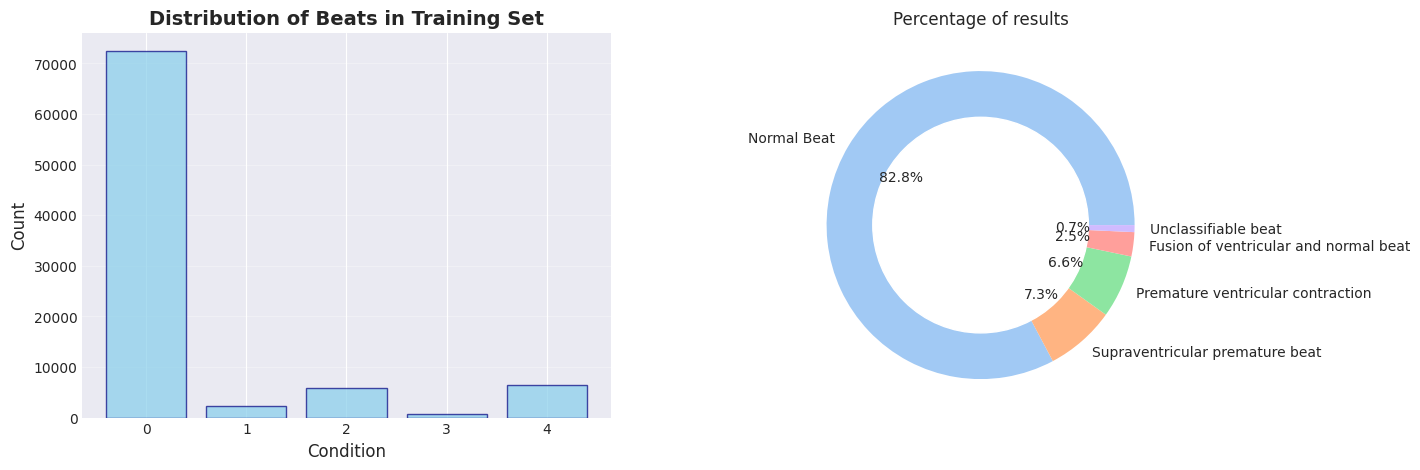


📊 DESEASE DISTRIBUTION
Mean count per digit: 17510.80
Standard deviation: 30818.49
Most common digit: 0.0 (appears 72471 times)
Least common digit: 3.0 (appears 641 times)
Distribution balance: 0.88%


In [7]:
# Define deseases column
target_column_index = train_dataset.shape[1] - 1

class_labels = train_dataset[target_column_index].unique()

# Classify test by label
class_names = {
        0: 'Normal Beat',
        1: 'Supraventricular premature beat',
        2: 'Premature ventricular contraction',
        3: 'Fusion of ventricular and normal beat',
        4: 'Unclassifiable beat'
    }

labels = ['Normal Beat', 'Supraventricular premature beat', 'Premature ventricular contraction', 'Fusion of ventricular and normal beat', 'Unclassifiable beat' ]

# Nan Values importance
null_col = train_dataset.isna().mean() * 100

# Divide sample
train_dataset[187] = train_dataset[187].astype(float)
num_of_values = train_dataset[187].value_counts()

# Create a comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
axes[0].bar(num_of_values.index, num_of_values.values, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('Condition', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Beats in Training Set', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Pie Chart
plt.title("Percentage of results")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(num_of_values.values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Statistical summary
print("\n" + "=" * 80)
print("📊 DESEASE DISTRIBUTION")
print("=" * 80)
print(f"Mean count per digit: {num_of_values.mean():.2f}")
print(f"Standard deviation: {num_of_values.std():.2f}")
print(f"Most common digit: {num_of_values.idxmax()} (appears {num_of_values.max()} times)")
print(f"Least common digit: {num_of_values.idxmin()} (appears {num_of_values.min()} times)")
print(f"Distribution balance: {(num_of_values.min() / num_of_values.max() * 100):.2f}%")

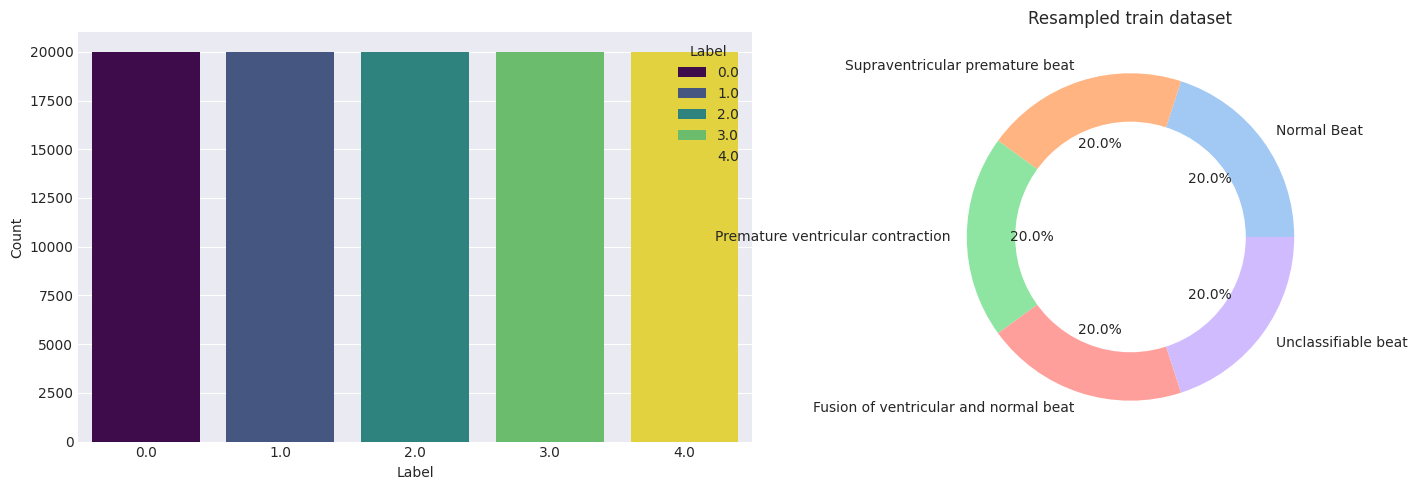


📊 DESEASE DISTRIBUTION
Mean count per digit: 20000.00
Standard deviation: 0.00
Most common digit: 0.0 (appears 20000 times)
Least common digit: 0.0 (appears 20000 times)
Distribution balance: 100.00%


In [ ]:
# Import module
from preprocessing import resampleData

# Call method top 
train_dataset, test_dataset = resampleData(train_dataset, test_dataset)

# Divide sample
num_of_values = train_dataset[187].value_counts()
data_for_plot = pd.DataFrame({'Label': num_of_values.index, 'Count': num_of_values.values})

# Create a comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
plt.title("Resampled train dataset")
sns.barplot(data=data_for_plot, x='Label', y='Count', hue='Label', palette='viridis',dodge=False, ax=axes[0])
plt.xticks(rotation=45)
plt.tight_layout()

# Pie Chart
plt.title("Resampled train dataset")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(num_of_values.values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Statistical summary
print("\n" + "=" * 80)
print("📊 RESAMPLED DATA")
print("=" * 80)
print(f"Mean count per digit: {num_of_values.mean():.2f}")
print(f"Standard deviation: {num_of_values.std():.2f}")
print(f"Most common digit: {num_of_values.idxmax()} (appears {num_of_values.max()} times)")
print(f"Least common digit: {num_of_values.idxmin()} (appears {num_of_values.min()} times)")
print(f"Distribution balance: {(num_of_values.min() / num_of_values.max() * 100):.2f}%")

In [ ]:
def plot_ecg_examples(raw_data, filtered_data, labels, numOfExamples=5):
  plt.figure(figsize=(10, numOfExamples*2.5))

  indices = np.random.choice(len(raw_data), numOfExamples, replace=False)
  print("Indexes:",indices)
  for i, idx in enumerate(indices):

    # Raw ECG
    plt.subplot(numOfExamples, 2, 2*i+1)
    plt.plot(raw_data[idx])
    plt.title(f'Class: {class_names[labels[idx]]}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Filtered ECG
    plt.subplot(numOfExamples, 2, 2*i + 2)
    plt.plot(filtered_data[idx], color='green')
    plt.title(f'Filtered ECG - Class: {class_names[labels[idx]]}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

  plt.title("Train Dataset")
  plt.tight_layout()
  plt.show()
plot_ecg_examples(X_train, train_filtered_ecg_signal, y_train)